<b><font color="red" size="6">ch13. 데이터 시각화 2절matplotlib</font></b>
# 1절. 시각화 개용
- 시각화 라이브러리 : matpltlib, seaborn, folium(지도시각화)
- matplotlib : 파이썬에서 가장 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
- seaborn : matplotlib 기반으로 다양한 색, 테마, 차트 기능과 groupby 기능을 추가한 라이브러리 

# 2절. matplotlib
- https://pypi.org/project/matplotlib/
- https://matplotlib.org/stable/api/index.html : api reference 

## 2.1 패키지 import 및 기본 설정

In [1]:
import matplotlib
matplotlib.__version__

'3.7.0'

In [2]:
import matplotlib.pyplot as plt

In [47]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
# 한글설정
# warning(경고) 안보이게
import warnings
# warnings.filterwarnings(action='ignore') # 경보 메세지 안보이게
warnings.filterwarnings(action='default') # 경고 메세지 보이게
# plt.rcParams['font.family'] = '~'를 바꿈
plt.rc('font',family='Malgun Gothic') # 윈도우즈
# plt.rc('font', family='AppleGothic') Mac 
# plt.rcParame['font.family'] = 'Malgun Gothic'
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐
import matplotlib.pyplot as plt
import seaborn as sns

## 2.2 그래프 그리기
- matplolib 으로 그래프를 그리기 위해서 다음의 단계
    1) 데이터 준비<br>
    2) 그래프 생성<br>
    3) 그래프 함수로 그리기<br>
    4) 그래프 커스텀마이징<br>
    5) 그래프 출력 및 저장<br>

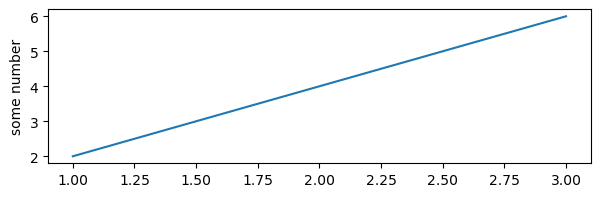

In [7]:
plt.figure(figsize=(7,2)) # 2) 그래프 객체 생성. 사이즈는 인치
plt.plot([1, 2, 3],[2, 4, 6]) # 3) 그래프 함수
plt.ylabel('some number') # 4) 그래프 커스터마이징
plt.show() # 5) 그래프 출력

## 2.3 그래프 영역 나누기
### 1) subplot()함수로 서브플롯 추가

In [6]:
import numpy as np
x = np.arange(0, 10, 0.01)
x.shape

(1000,)

In [11]:
y = np.sin(x)
y.shape

(1000,)

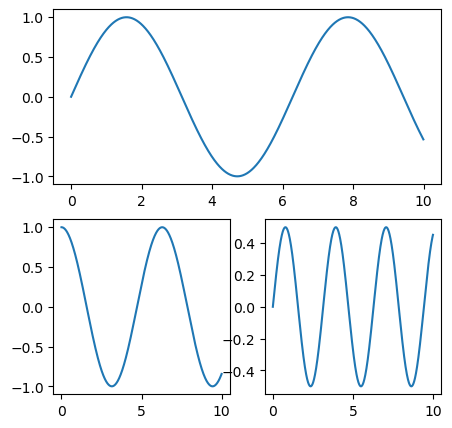

In [14]:
plt.figure(figsize=(5,5))
plt.subplot(2, 1, 1) # 2행 1열의 subplot에서 1번째 subplot에 다음과 같이 그래프 그려
plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3) # 2행 2열의 subplot 에서 3번째 subplot에 다음과 같이 그래프 그려
plt.plot(x, np.cos(x))
plt.subplot(2, 2, 4) # 2행 2열의 subplot 에서 4번째 subplot에 다음과 같이 그래프 그려
plt.plot(x, np.sin(x)*np.cos(x))
plt.show()

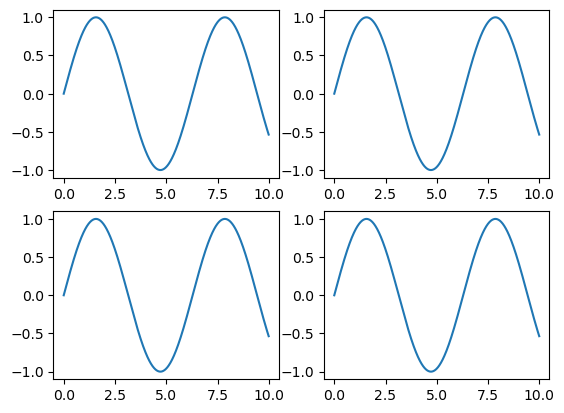

In [17]:
plt.subplot(2, 2, 1); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 2); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 4); plt.plot(x, np.sin(x))
plt.show()

### 2) subplots()함수로 서브플롯 추가
plot 함수에서 색상이나 스타일을 조정 : (https://wikidocs.net/92085)

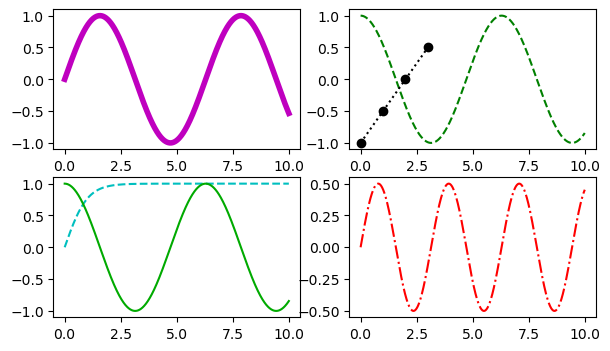

In [50]:
# 2행 2열 서브 플롯 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,4))
axes[0,0].plot(x, np.sin(x), color='m', linewidth=4)
axes[0,1].plot(x, np.cos(x), color='g', linestyle='--')
axes[1,0].plot(x, np.tanh(x), 'c--') # 컬러 c 라인스티일 -- 
axes[1,0].plot(x, np.cos(x), color='#00AA00')
axes[0,1].plot([0,1,2,3],[-1, -0.5, 0, 0.5], 'ko:') # k는 블랙, o 는 marker='o'
axes[1,1].plot(x, np.sin(x)*np.cos(x), 'r-.')

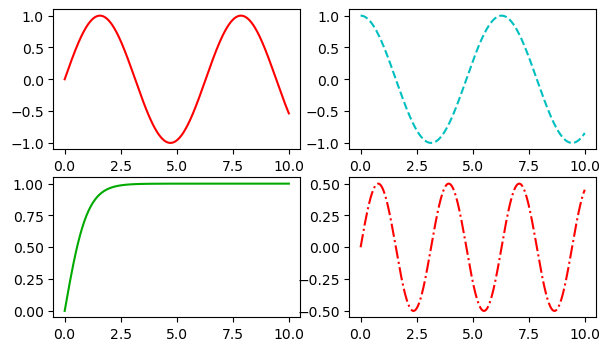

In [54]:
# 2행 2열 서브플롯(for문 사용)
func_list = [np.sin, np.cos, np.tanh, lambda x:np.sin(x)*np.cos(x)]
fmt_list = ['r','c--','#00AA00', 'r-.']
fig, axes = plt.subplots(2, 2, figsize=(7,4))
list(enumerate(axes.flat))
for idx, ax in enumerate(axes.flat):
    ax.plot(x, func_list[idx](x), fmt_list[idx])

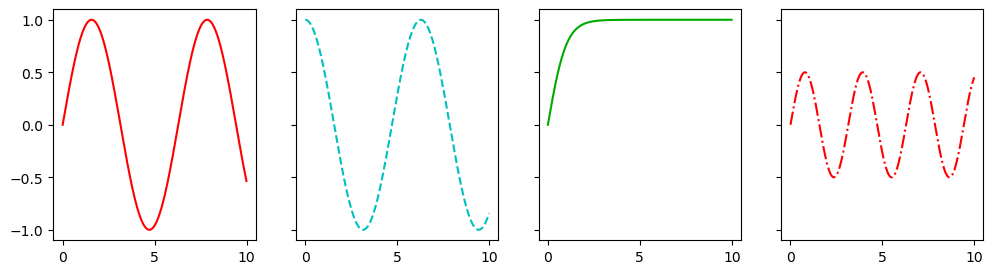

In [57]:
# 1행 4열 서브플롯
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,3), sharey=True) # y축 공유
for i, ax in enumerate(axes):
    ax.plot(x, func_list[i](x), fmt_list[i])

## 2.4 다양한 그래프 그리기
### 1)pyplot 함수들 : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html
### 2)matplotlib.pyplot.plot(): 선그래프

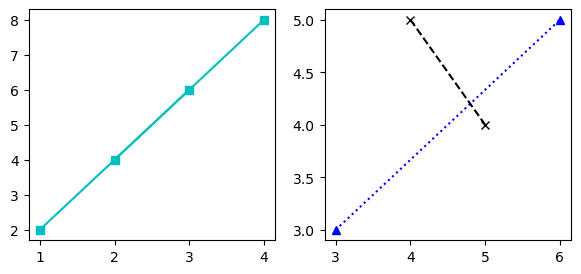

In [59]:
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
axes[0].plot([[1, 2],[3, 4]],
            [[2, 4],[6, 8]], 'cs-') # color= 'c':cyan, marker='s':사각마커, linestyle='-'
axes[1].plot([3,6],[3,5], 'b^:')
axes[1].plot([4,5],[5,4], 'kx--')

### 30 pandas.DataFrame.plot()
- plt.plot(x, y, fmt) <br>
- df.plot(x=None, y=None, kind='line', figsize=None, title=None, grid=None, xlim, ylim,....)<br>
    * kind : line(기본값), scatter(점도표), bar, barh, box, density, pie ....
    * figsize : tuple(인치단위)
    * xlim,ylim : list/tuple

In [60]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.sample(1)

,sepal_length,sepal_width,petal_length,petal_width,species
60,5.0,2.0,3.5,1.0,versicolor


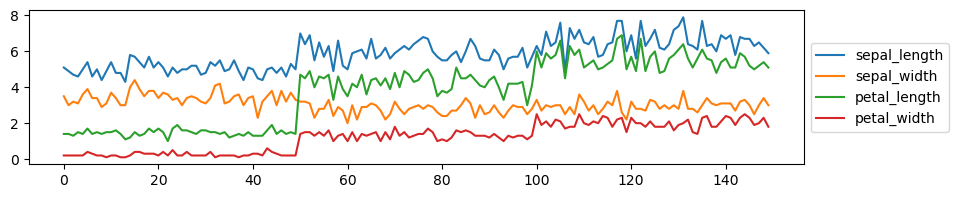

In [64]:
g = iris.plot(figsize=(10,2))
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

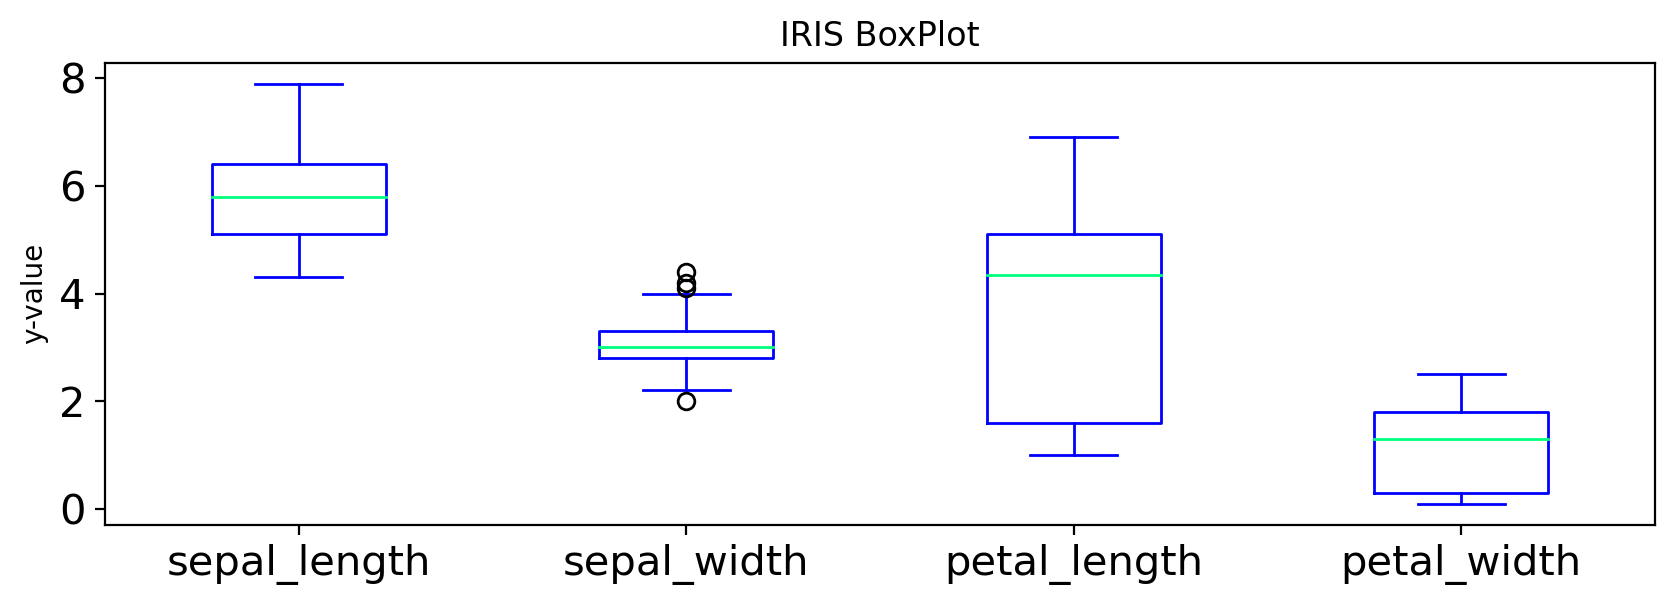

In [78]:
iris.plot(kind='box', figsize=(10,3), title='IRIS BoxPlot',
         ylabel='y-value',fontsize=15, colormap='winter')
plt.show()

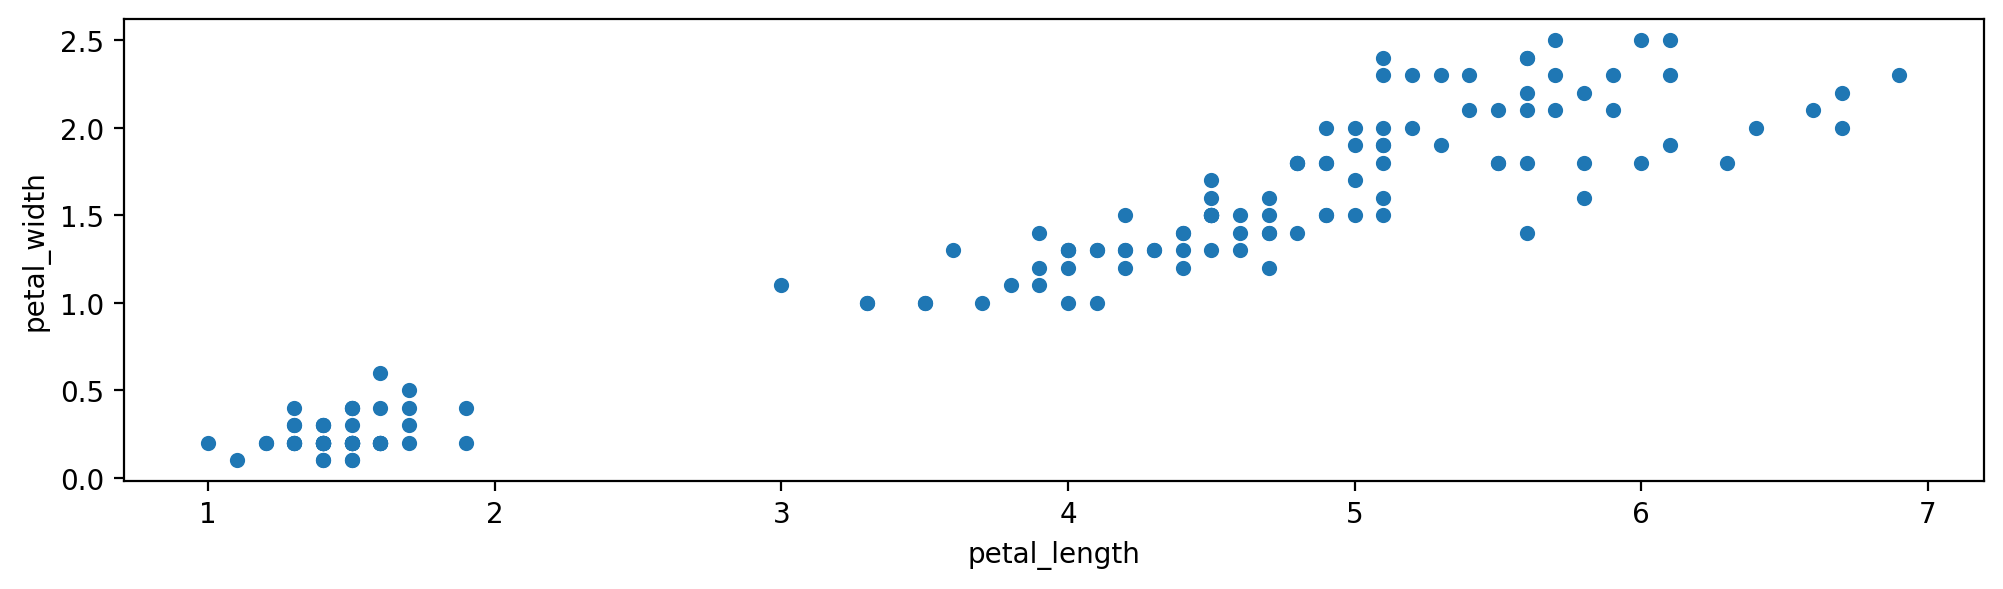

In [77]:
iris.plot(kind='scatter', x='petal_length', y='petal_width', figsize=(12,3))
plt.show()

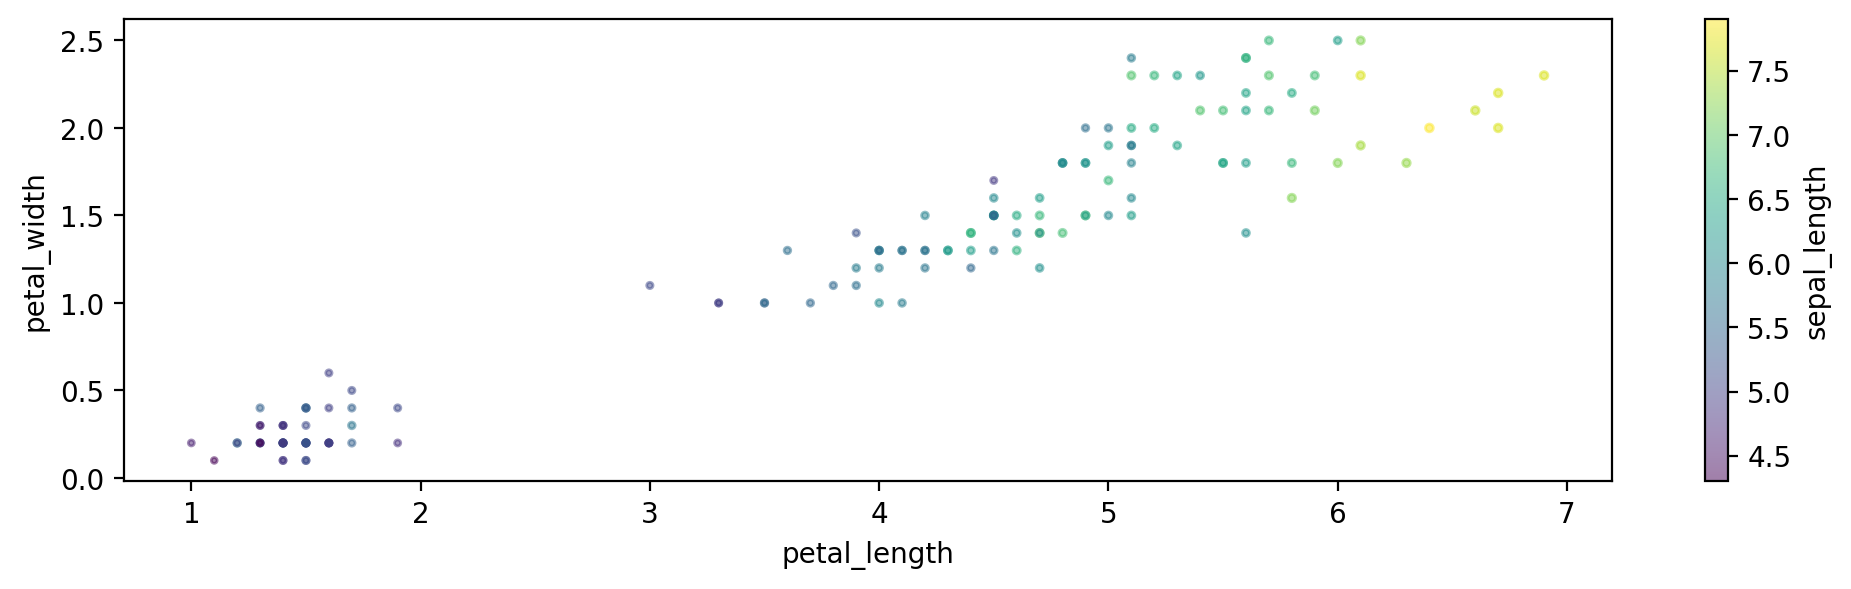

In [89]:
iris.plot(kind='scatter', x='petal_length', y='petal_width', figsize=(12,3),
         s='sepal_length', # s : 점의 크기 , c : 색상
         c='sepal_length',
         alpha=.5) # 투명도 
plt.show()

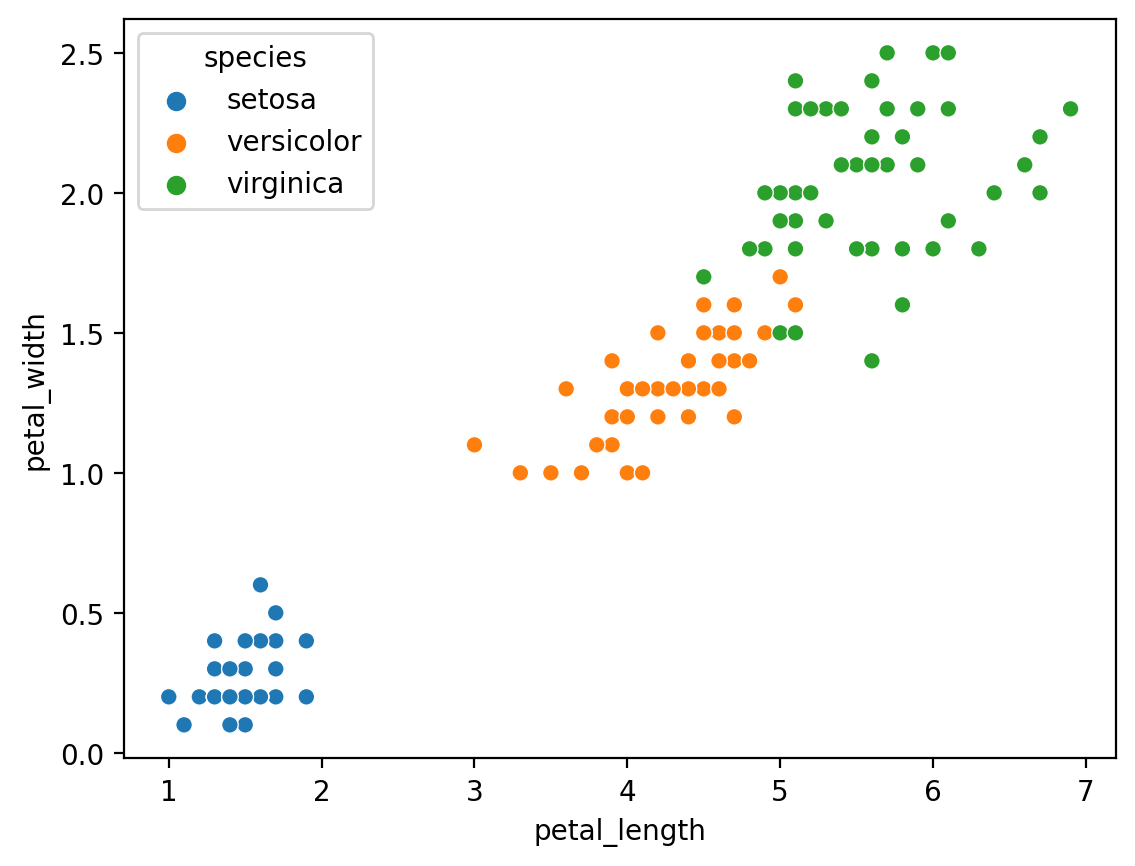

In [92]:
import seaborn as sns
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
plt.show()

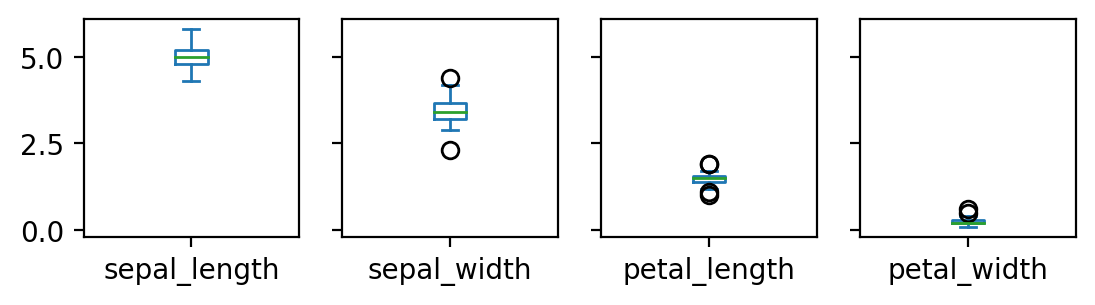

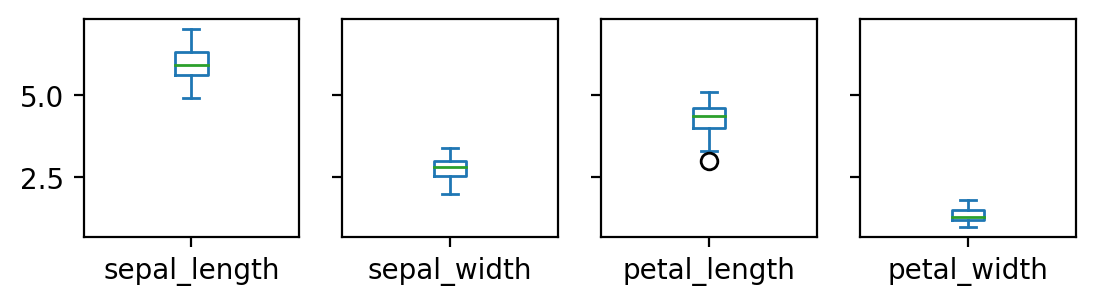

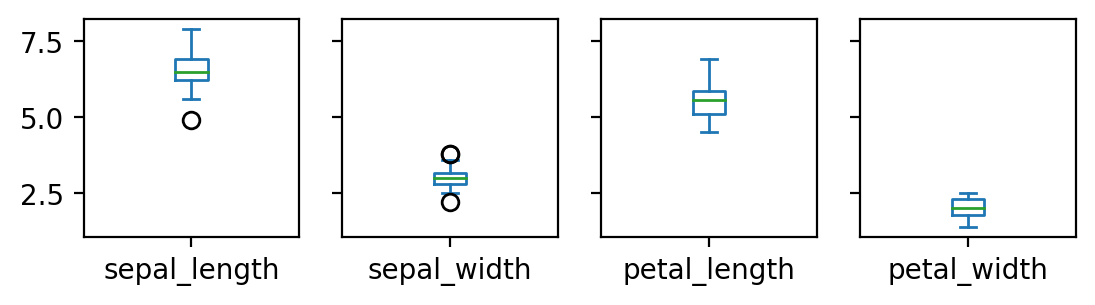

In [98]:
# 종별 boxplot 
iris.groupby('species').plot(kind='box',
                            subplots=True,
                            layout=(3, 4),
                            sharey=True) # y축 공유
plt.show()

### 4) plt.scatter() : 산점도

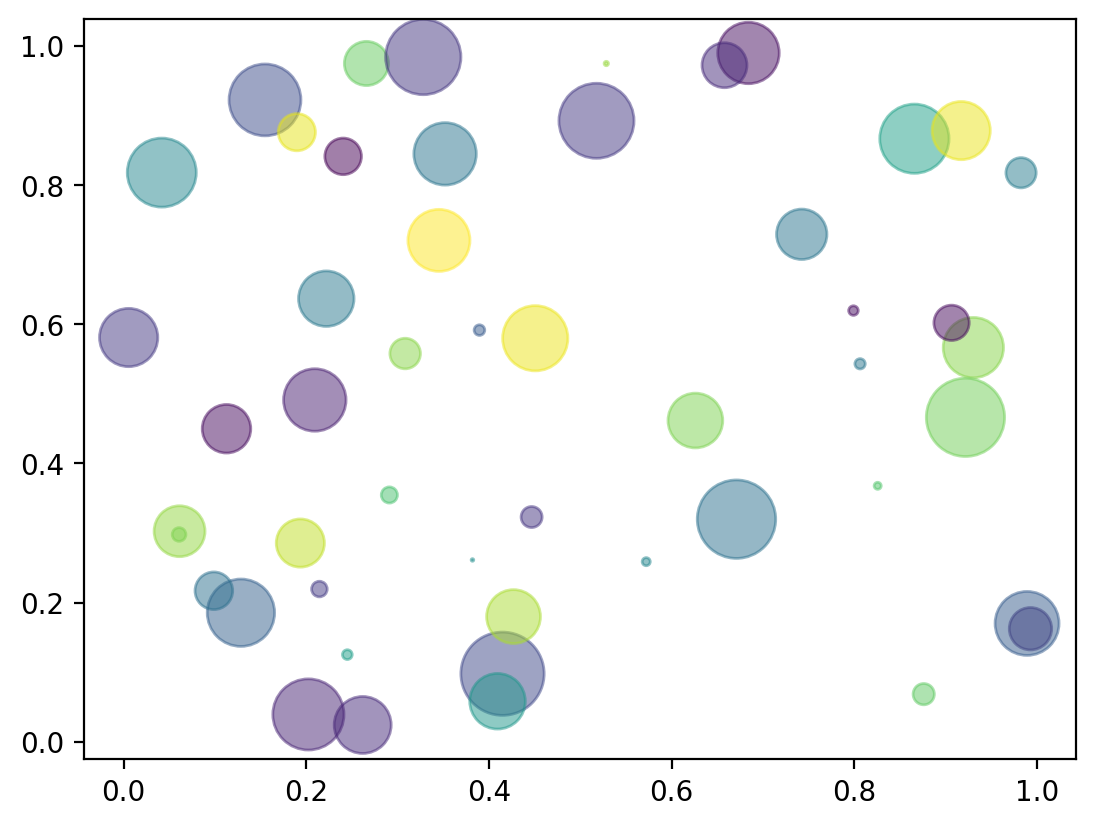

In [102]:
x = np.random.rand(50) # 균등분포의 1차원 난수 50개 배열 발생(배열)
y = np.random.rand(50)
colors = np.random.rand(50)
area = (np.random.rand(50)*30)**2
plt.scatter(x, y, s=area, 
           c = colors, 
           alpha=.5)
plt.show()

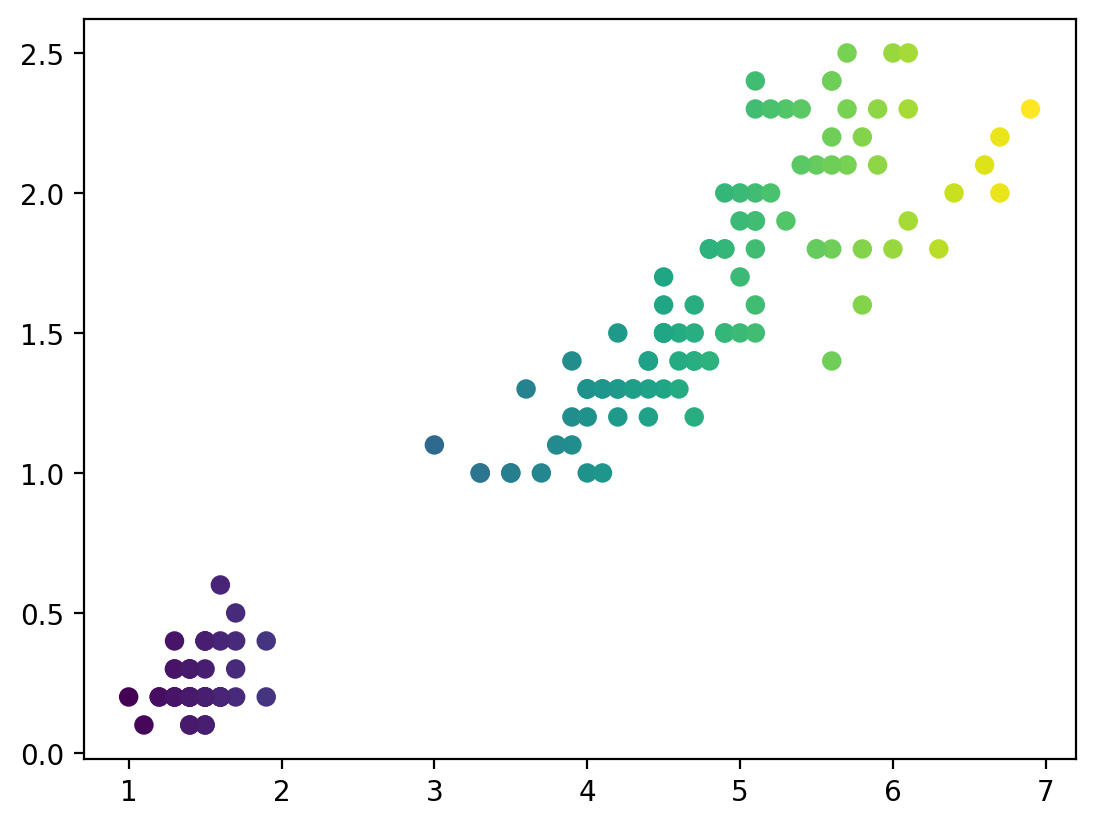

In [104]:
plt.scatter(x=iris.petal_length, y=iris.petal_width,
           c=iris.petal_length*20)
plt.show()

## 2.5 그외 그래프 그리기
### 1) fill(), fill_between(), scatter()
### 2) bar(), barh(), axvline(), axhline()
### 3) hist(히스토그램 = 밀도), boxplot(분포를 몰라), violinplot()

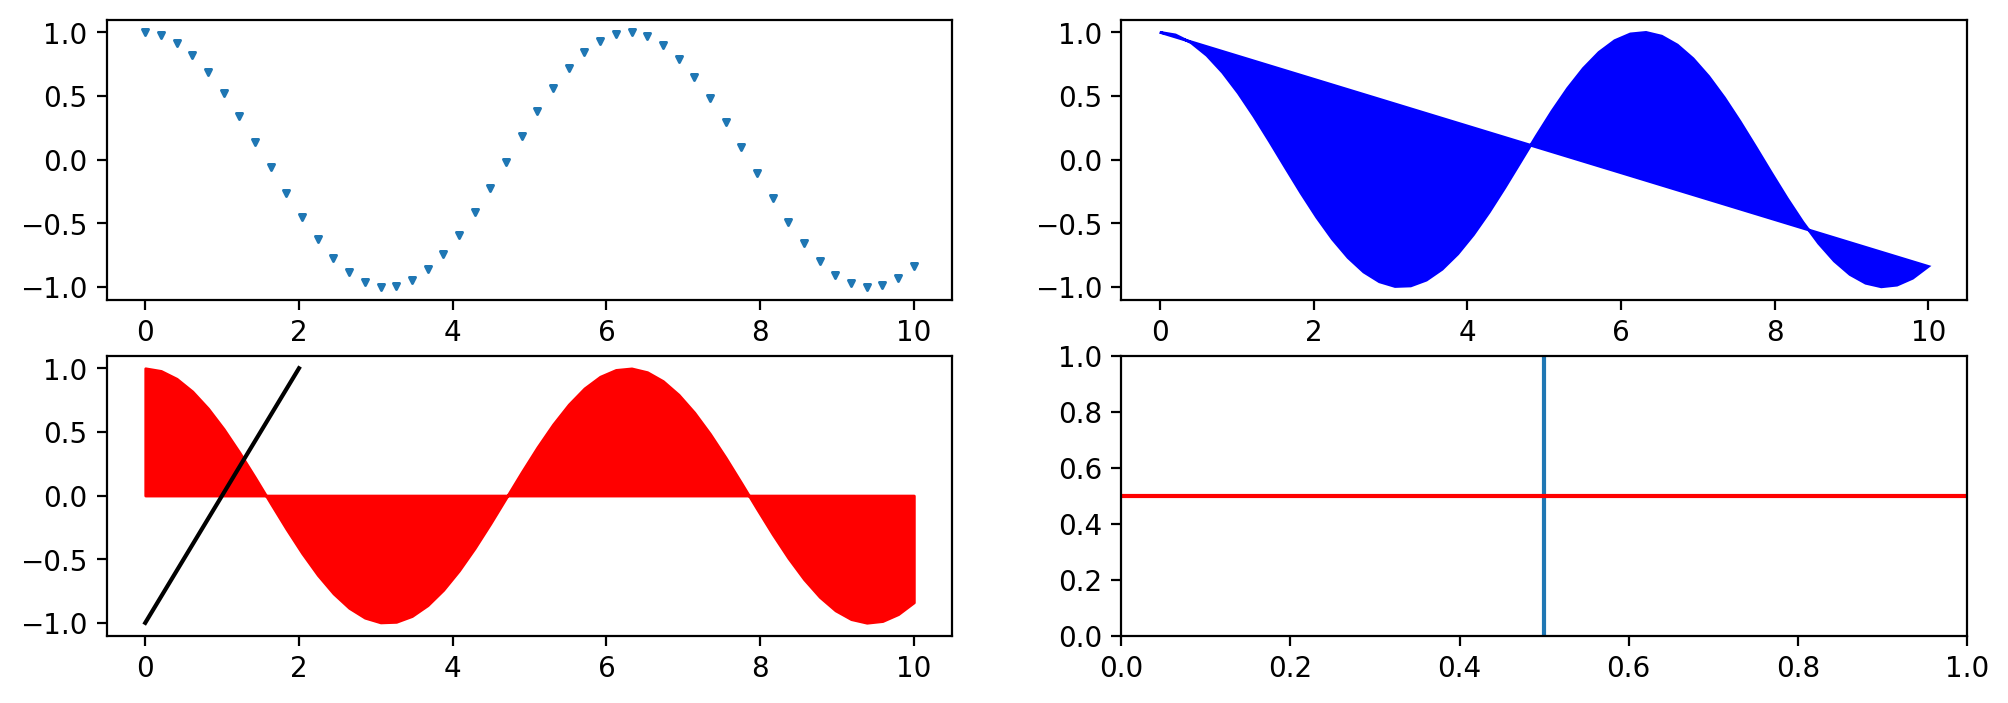

In [114]:
x = np.linspace(0, 10)
y = np.cos(x)
fig, axes = plt.subplots(2, 2, figsize=(12,4))
axes[0,0].scatter(x, y, s=5, marker='v')
axes[0,1].fill(x, y, c='b')
axes[1,0].fill_between(x, y, color='r')
axes[1,0].plot([0,2],[-1,1], 'k')
axes[1,1].axvline(0.5)
axes[1,1].axhline(0.5, c='r')
plt.show()

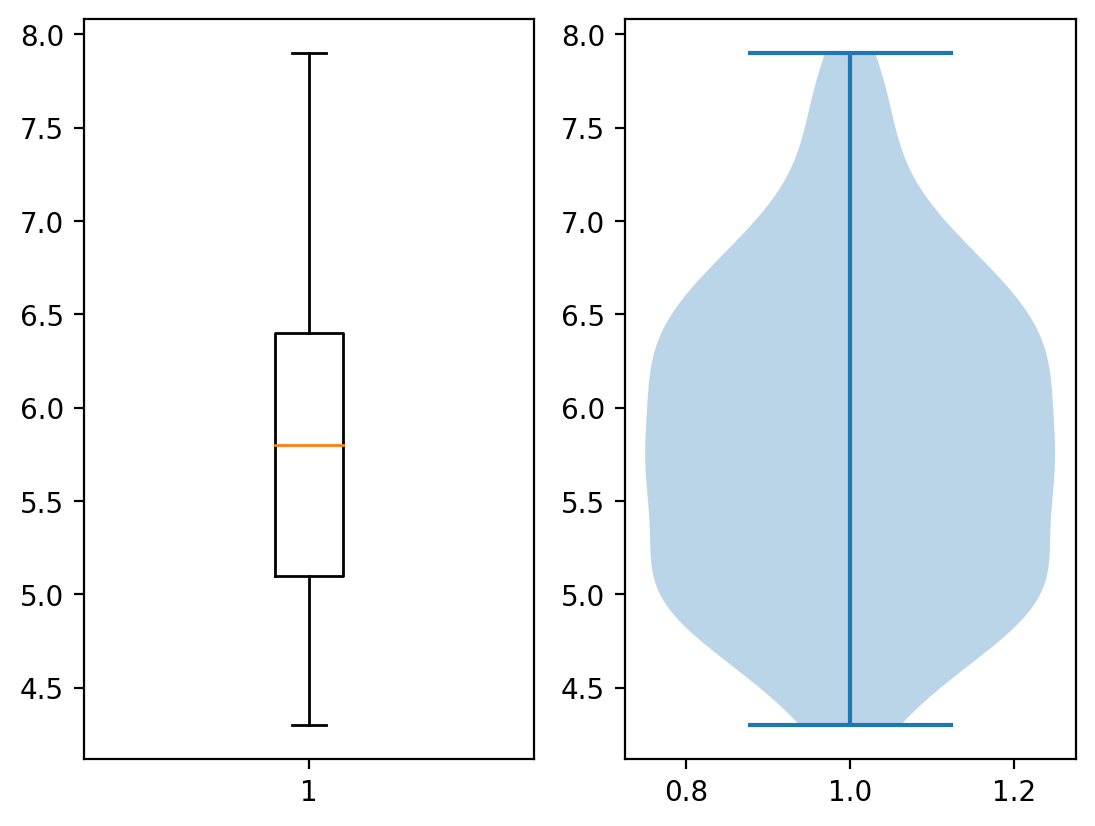

In [116]:
# boxplot vs. violinplot
fig, axes = plt.subplots(ncols=2)
axes[0].boxplot(iris.sepal_length)
axes[1].violinplot(iris.sepal_length)
plt.show()

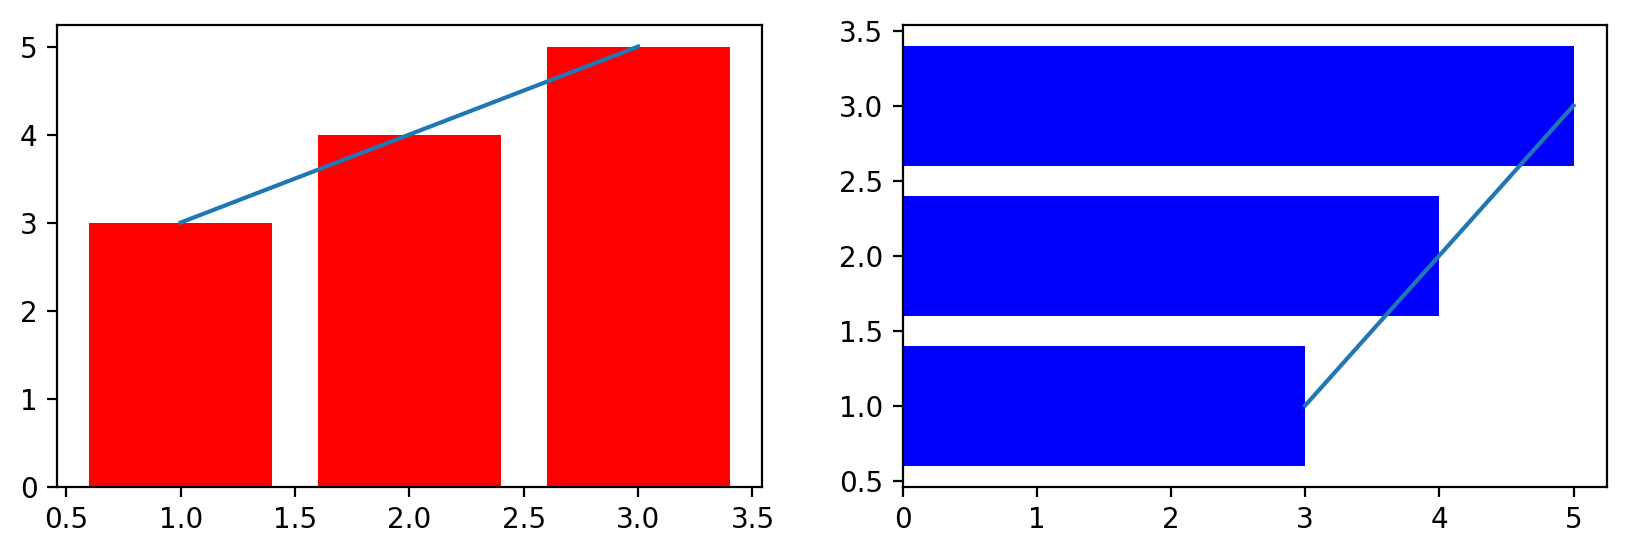

In [10]:
# bar, barh
x = [1,2,3]
y = [3,4,5]
fig, axes = plt.subplots(ncols=2, figsize=(10, 3))
axes[0].bar(x, y, color='r')
axes[0].plot(x, y)
axes[1].barh(x, y, color='b')
axes[1].plot(y, x)

(array([ 4.,  5.,  7., 16.,  9.,  5., 13., 14., 10.,  6., 10., 16.,  7.,
        11.,  4.,  2.,  4.,  1.,  5.,  1.]),
 array([4.3 , 4.48, 4.66, 4.84, 5.02, 5.2 , 5.38, 5.56, 5.74, 5.92, 6.1 ,
        6.28, 6.46, 6.64, 6.82, 7.  , 7.18, 7.36, 7.54, 7.72, 7.9 ]),
 [<matplotlib.patches.Polygon at 0x1d753013eb0>])

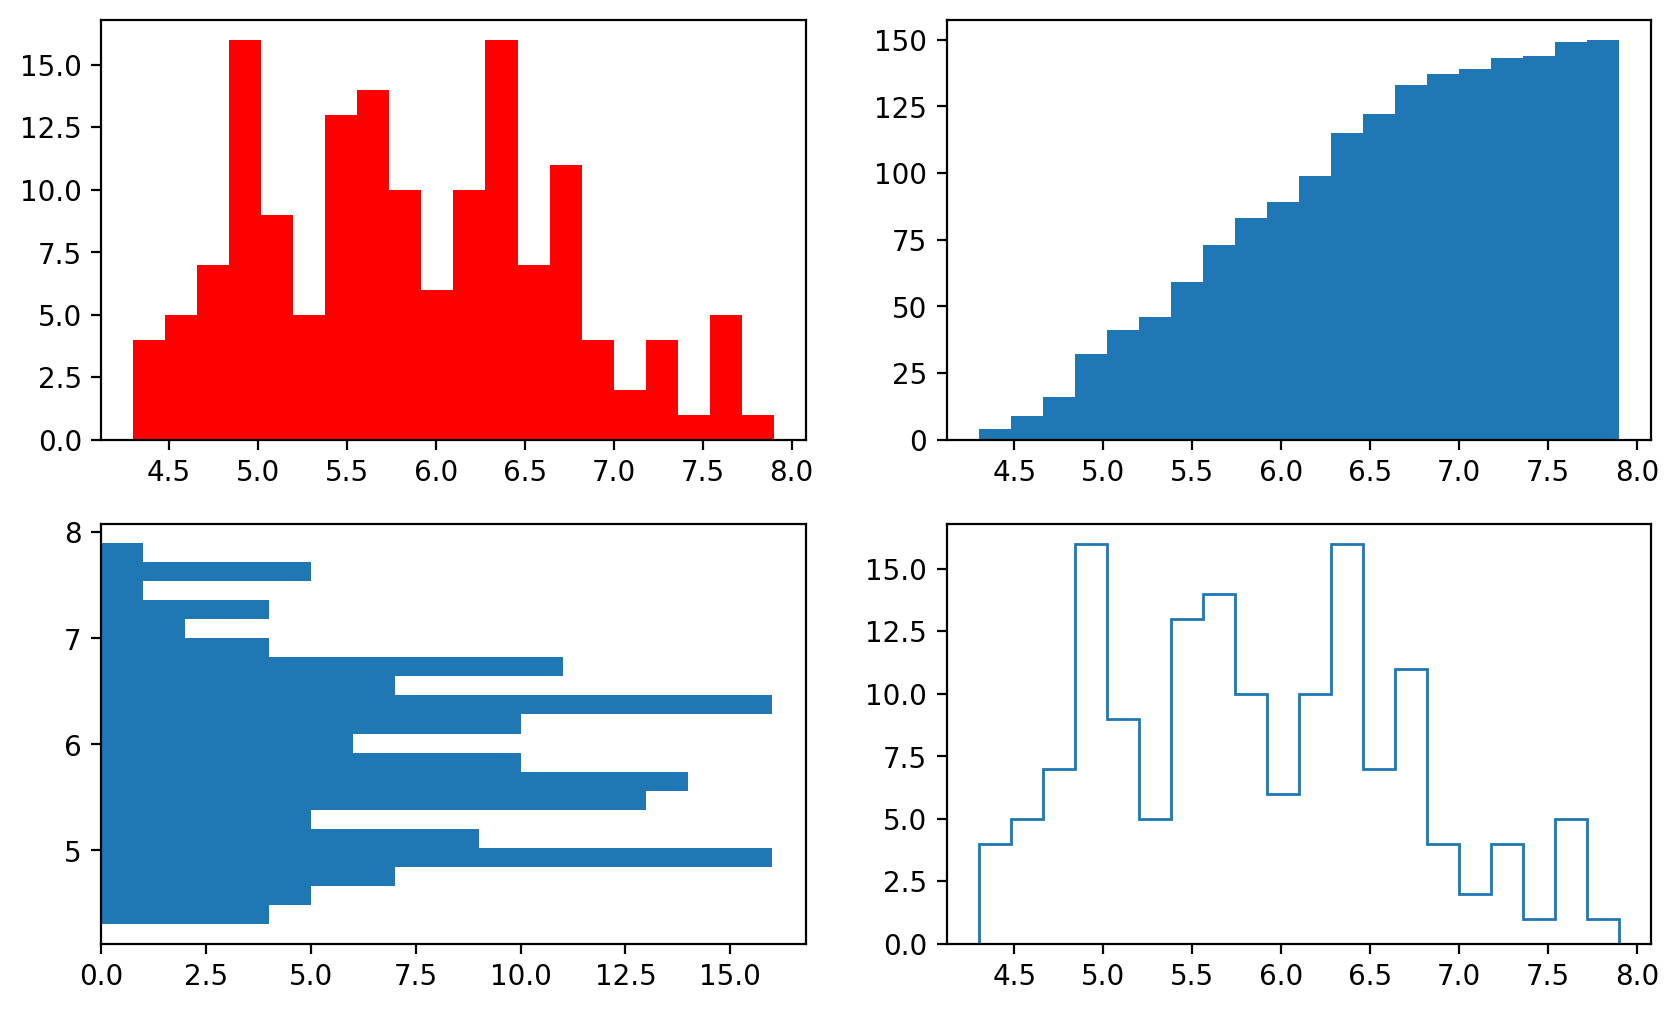

In [16]:
# hist - 히스토그램(도수분포표를 그래프화)
import seaborn as sns
iris = sns.load_dataset('iris')
fig, axes = plt.subplots(2, 2, figsize=(10,6))
axes[0,0].hist(iris.sepal_length, bins=20, color='r') # 히스토그램
axes[0,1].hist(iris.sepal_length, bins=20, cumulative=True) # 누적 히스토그램
axes[1,0].hist(iris.sepal_length, bins=20, orientation='horizontal') # 수평 히스토그램
axes[1,1].hist(iris.sepal_length, bins=20, histtype='step') 

## 2.6 그래프 커스터마이징
### 1) linestyle, linewidth, color, marker
### 2) text(), annotate
https://matplotlib.org/api/axes_api.html#text

In [29]:
# 한글 기본 폰트 설정 방법1
# plt.rcParams['font.family'] = '~'를 바꿈
plt.rc('font',family='Malgun Gothic') # 윈도우즈
# plt.rc('font', family='AppleGothic') Mac 
# plt.rcParame['font.family'] = 'Malgun Gothic'
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐

In [97]:
# from matplotlib.font_manager import FontProperties
# font_path = 'C:/Windows/Fonts/Jalnan2TTF.TTF'
# font_prop = FontProperties(fname=font_path, size=20)
# import numpy as np
from matplotlib.font_manager import FontProperties
font_path = r'C:\Windows\Fonts\HMKMAMI.TTF'
font_prop = FontProperties(fname=font_path, size=20)
import numpy as np

import matplotlib

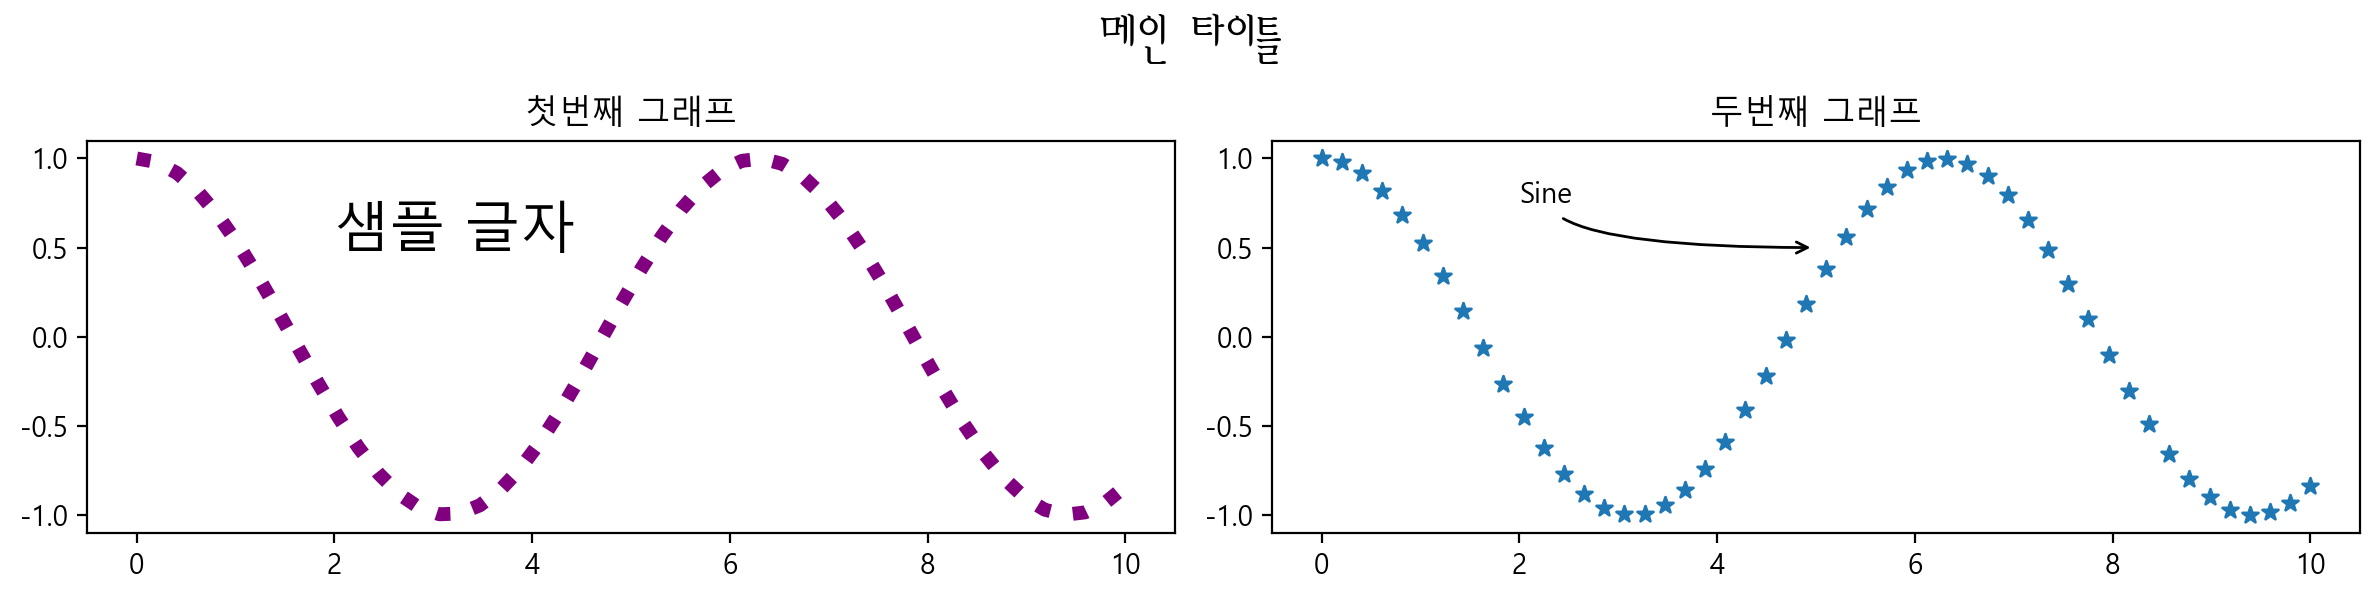

In [98]:
x = np.linspace(0, 10)
y = np.cos(x)
fig, axes = plt.subplots(1, 2, figsize=(12,3))
axes[0].plot(x, y, linewidth=5, linestyle=':', color='purple')
axes[0].text(2, 0.5, '샘플 글자', style='italic', fontsize=20)
axes[0].set_title('첫번째 그래프')
axes[1].scatter(x, y, marker='*')
axes[1].annotate('Sine', xytext=(2, 0.75), # 글자가 있을 좌표 위치
                xy = (5, 0.5), # 화살표 가르킬 좌표 위치
                arrowprops= dict(arrowstyle='->', # 화살표 모양 
                             connectionstyle='angle3'))
axes[1].set_title('두번째 그래프')
# 레이 아웃이 자동 조정
# rect = [left(0), bottom(0), rigth(1), top(1)] 각 경계의 상대적 비율
plt.tight_layout(rect = [0, 0, 1, 0.9])
plt.suptitle('메인 타이틀', fontproperties=font_prop)
plt.show()

### 3) 수학기호
- https://matplotlib.org/users/mathtext.html

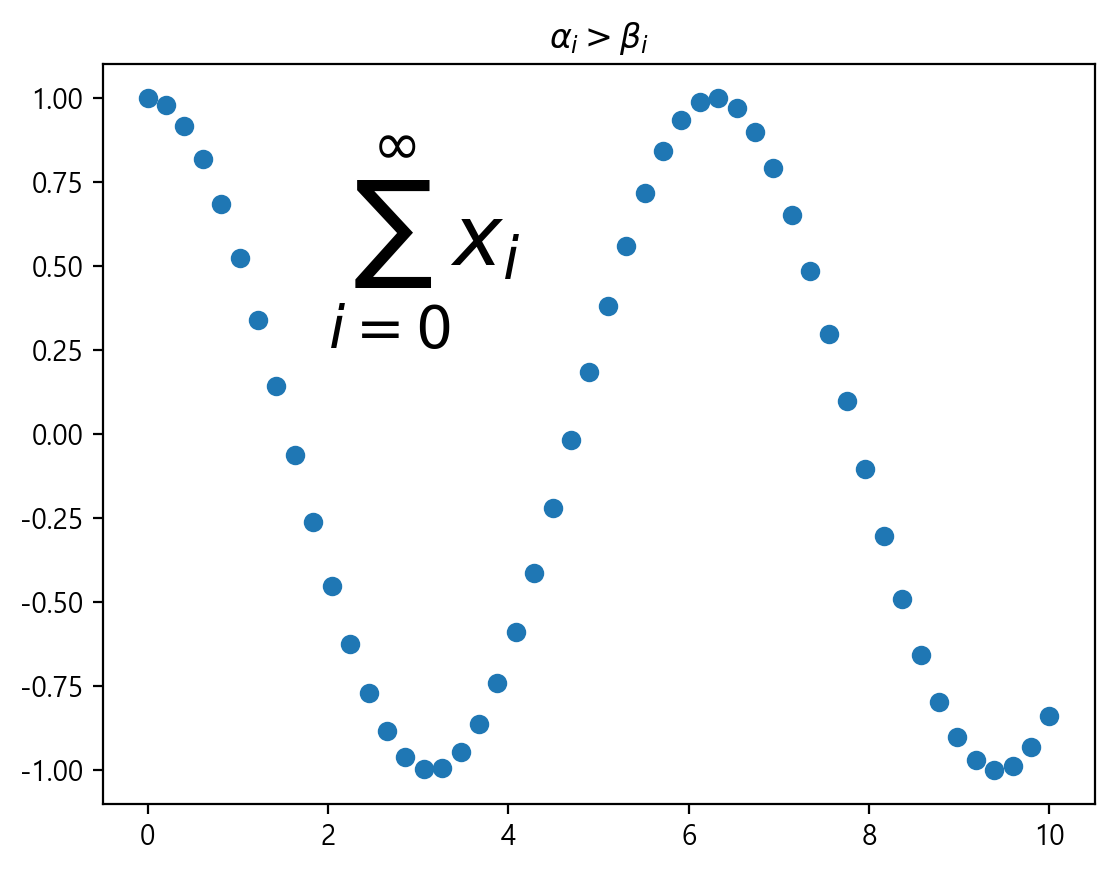

In [88]:
plt.scatter(x, y, marker='o')
plt.title(r'$\alpha_i > \beta_i$')
plt.text(2, 0.5, r'$\sum_{i=0}^\infty x_i$', fontsize=30)
plt.show()

### 4) 축과 눈금

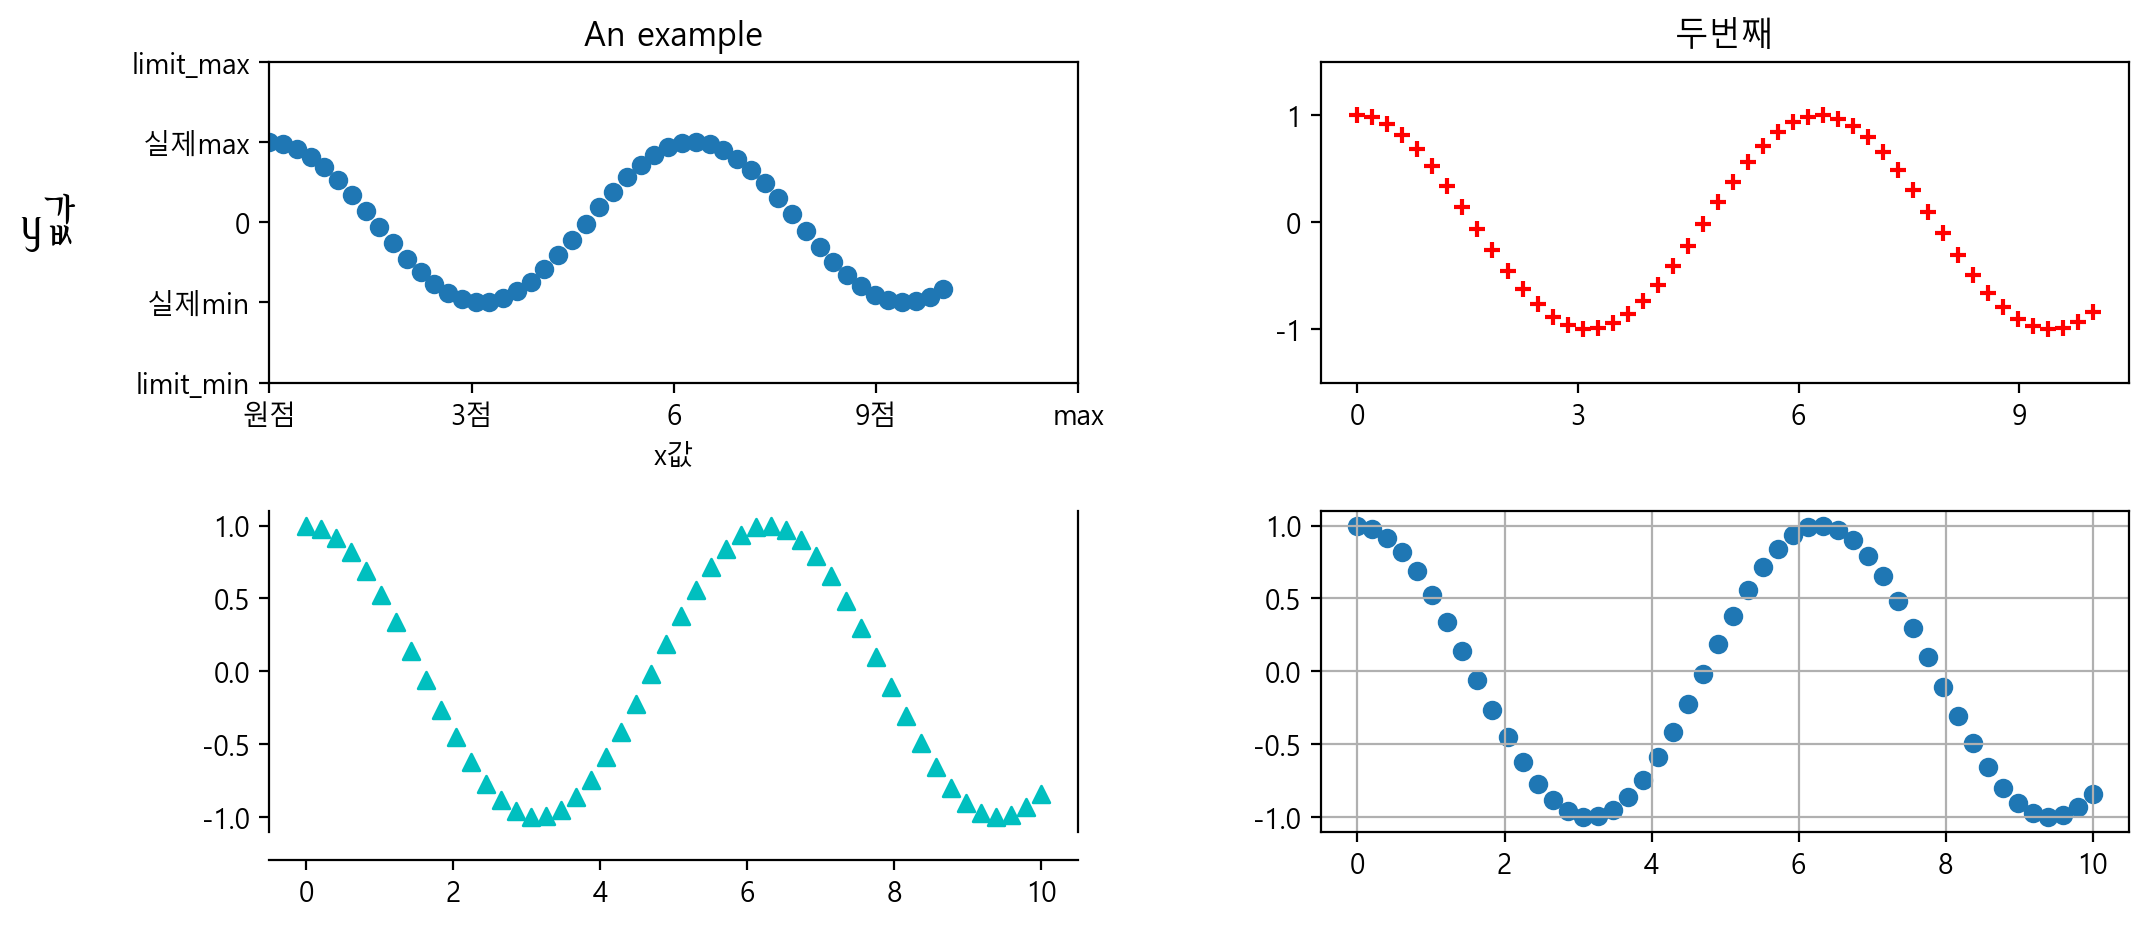

In [130]:
x = np.linspace(0, 10) # 0부터 10까지 일정한 간격의 50개 값을 배열
y = np.cos(x)
fig, axes = plt.subplots(2, 2, figsize=(12,5))
# subplot 들 끼리의 여백 조정
plt.subplots_adjust(hspace=0.4, wspace=0.3) # hspace 위아래 여백 / wspace 좌우 여백
axes[0,0].scatter(x, y)
axes[0,0].set(title='An example', xlabel='x값',
             xlim=[0, 12], #x축 눈금의 범위
             ylim=[-2,2], # y축 눈금의 범위
             xticks=[0, 3, 6, 9, 12], # x축 눈금 값
             xticklabels=['원점','3점',6,'9점','max'], # x축 눈금 라벨
             yticks=[-2, -1, 0, 1, 2],
             yticklabels=['limit_min', '실제min', 0, '실제max', 'limit_max'],
             )
axes[0,0].set_ylabel('y값', 
    fontproperties=font_prop, 
    rotation=0,          # 가로로 표시
    labelpad=30,         # 축과의 간격
    y=0.5,               # y축 수직 위치 (0.0: 아래쪽, 1.0: 위쪽)
    ha='center',         # 가로 정렬 (left, center, right 가능)
    va='center',         # 세로 정렬 (top, center, bottom 가능)
)
axes[0,1].scatter(x, y, color='r', marker='+')
axes[0,1].set_title('두번째')
axes[0,1].set_xticks(range(0,11,3))
axes[0,1].set_ylim(-1.5,1.5)
axes[1,0].scatter(x, y, color='c', marker='^')
axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['bottom'].set_position(('outward', 10))
axes[1,1].scatter(x,y)
axes[1,1].grid(True)
plt.show()

### 5) 축공유 ★

In [131]:
x = np.arange(0, 10)
y1 = 0.5*x**2
y2 = -y1

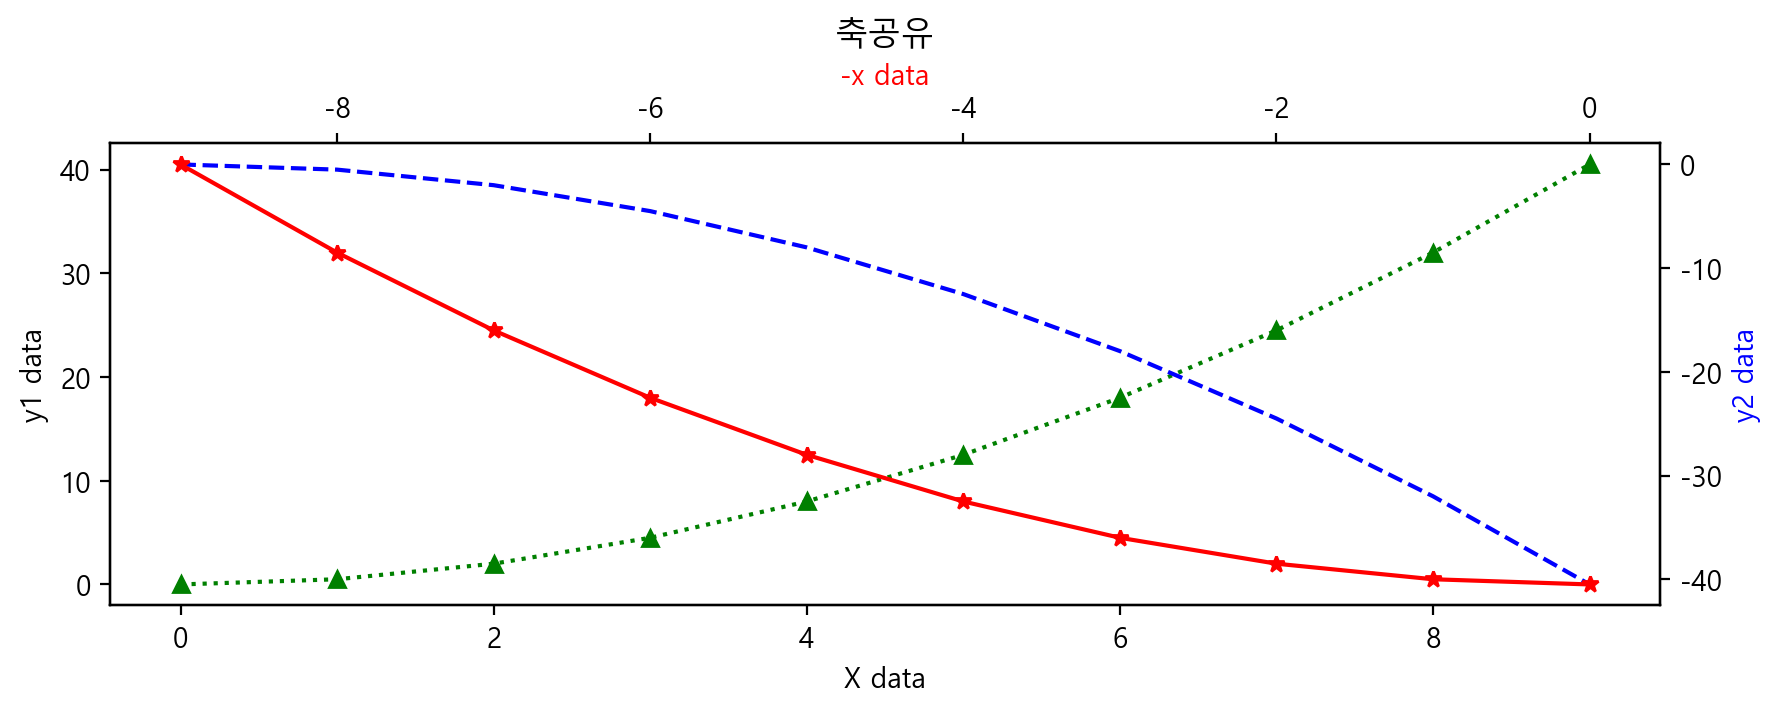

In [144]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax1.plot(x, y1, 'g^:')
ax1.set(title='축공유', ylabel='y1 data', xlabel='X data')

ax2 = ax1.twinx() # ax1과 x축을 공유하는 ax2
ax2.plot(x, y2, 'b--')
ax2.set_ylabel('y2 data', color='b')

ax3 = ax1.twiny() # ax1과 y축을 공유하는 ax3
ax3.plot(-x, y1, 'r*-')
ax3.set_xlabel('-x data', color='r')
plt.show()

### 6) 범례 표시
- https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot
### 7) 플롯 스타일 지정(plt.rc())
- 플롯 스타일 지정시 플롯의 기존 설정값이 초기화 될수있어용~
    * plt.rc('font',family='Malgun Gothic') # 윈도우즈
    * plt.rc('axes', unicode_minus=False) # 축의 - 깨짐방지

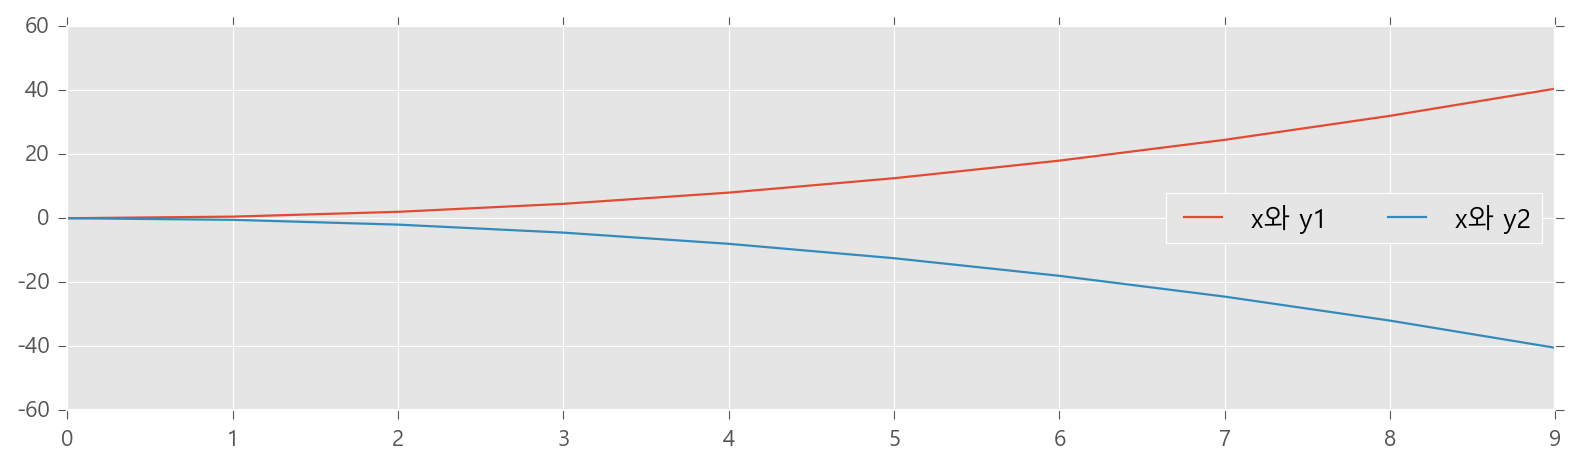

In [160]:
fig, ax = plt.subplots(figsize=(12,3))
plt.style.use('ggplot') # default, ggplot, seaborn, classic
plt.rc('font',family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐방지
ax.plot(x, y1, label='x와 y1')
ax.plot(x, y2, label='x와 y2')
plt.legend(loc='center right', ncol=2, bbox_to_anchor=(1, 0.5))
plt.show()